In [1]:
import numpy as np
from keras.models import model_from_json
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay

In [11]:
import os
drive_folder = '/content/drive/MyDrive/Human Activity Recognition/Emotion_detection_with_CNN-main'

os.chdir(drive_folder)

In [15]:
import zipfile

# Specify the path to the zip file and the destination directory
zip_file_path = '/content/drive/MyDrive/Human Activity Recognition/Emotion_detection_with_CNN-main/archive.zip'
destination_directory = '/content/drive/MyDrive/Human Activity Recognition/Emotion_detection_with_CNN-main/'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_directory)


In [2]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# load json and create model
json_file = open('/content/drive/MyDrive/Human Activity Recognition/Emotion_detection_with_CNN-main/model/emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

In [4]:
# load weights into new model
emotion_model.load_weights("/content/drive/MyDrive/Human Activity Recognition/Emotion_detection_with_CNN-main/model/emotion_model.h5")
print("Loaded model from disk")

Loaded model from disk


In [16]:
# Initialize image data generator with rescaling
test_data_gen = ImageDataGenerator(rescale=1./255)


In [17]:
# Preprocess all test images
test_generator = test_data_gen.flow_from_directory(
        '/content/drive/MyDrive/Human Activity Recognition/Emotion_detection_with_CNN-main/archive/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

# do prediction on test data
predictions = emotion_model.predict_generator(test_generator)

Found 7174 images belonging to 7 classes.


<ipython-input-17-0809861afa52>:10: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = emotion_model.predict_generator(test_generator)


-----------------------------------------------------------------
[[117  15 140 225 165 200  96]
 [ 12   0  11  33  22  20  13]
 [111  14  99 260 202 205 133]
 [186  23 238 462 305 353 203]
 [132  15 165 345 213 232 131]
 [131  13 151 350 223 224 155]
 [ 98   6 111 213 152 147 104]]


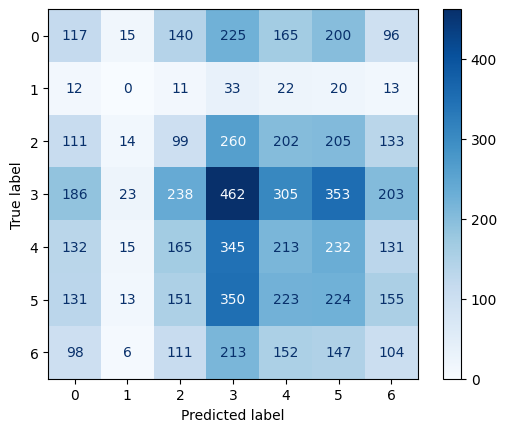

In [20]:
# see predictions
# for result in predictions:
#     max_index = int(np.argmax(result))
#     print(emotion_dict[max_index])

print("-----------------------------------------------------------------")
# confusion matrix
c_matrix = confusion_matrix(test_generator.classes, predictions.argmax(axis=1))
print(c_matrix)
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=emotion_dict)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()


In [21]:
# Classification report
print("-----------------------------------------------------------------")
print(classification_report(test_generator.classes, predictions.argmax(axis=1)))

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.15      0.12      0.13       958
           1       0.00      0.00      0.00       111
           2       0.11      0.10      0.10      1024
           3       0.24      0.26      0.25      1770
           4       0.17      0.17      0.17      1233
           5       0.16      0.18      0.17      1247
           6       0.12      0.13      0.12       831

    accuracy                           0.17      7174
   macro avg       0.14      0.14      0.14      7174
weighted avg       0.17      0.17      0.17      7174

